# MACHINE LEARNING - ANALISIS NO SUPERVISADO

Realizado por: Hugo Cordoba Leal

In [76]:
# Importamos las librerias necesarias para resolver el caso

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

random_state = 42

**Caso 1. Clústeres de enfermedades cardiovasculares**

In [77]:
# Leemos el dataset de enfermedades cardiovasculares
df = pd.read_csv('./Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


**Procesamiento de datos**

In [78]:
X = df.drop(['patientid', 'target'], axis=1)  # Eliminar columnas de identificación y objetivo
feature_names = X.columns

**Normalizacions de los datos**

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2


**Clustering**

Para ello, he elegido clusterizar los datos entrenando el modelo K-Means 

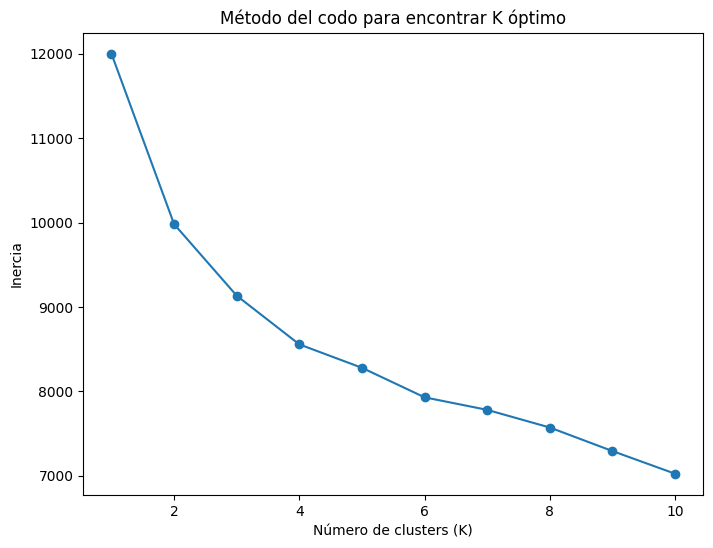

In [80]:
# Determinar el número óptimo de clusters (K)
# Se utiliza el método del codo para encontrar el número óptimo de clusters.
# Se ajusta el modelo K-means con diferentes valores de K y se calcula
# la inercia.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Mostramos graficamente la inercia
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar K óptimo')
plt.show()

**Entrenamiento del modelo**

In [81]:
# Entrenar el modelo K-means con el número óptimo de clusters
k_optimo = 3  # Seleccionar el valor óptimo de K según el método del codo o el coeficiente de silueta
kmeans = KMeans(n_clusters=k_optimo, random_state=random_state)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [82]:
# Obtener las etiquetas de los clusters y asignarlas a los datos
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [83]:
# Analizar y visualizar los clusters
for i in range(k_optimo):
    print(f"Cluster {i+1}:")
    print(df[df['cluster'] == i][feature_names].describe())

Cluster 1:
              age  gender   chestpain   restingBP  serumcholestrol  \
count  226.000000   226.0  226.000000  226.000000       226.000000   
mean    50.030973     0.0    0.946903  156.915929       344.858407   
std     18.035617     0.0    0.987393   31.231138       136.054066   
min     20.000000     0.0    0.000000   94.000000         0.000000   
25%     36.000000     0.0    0.000000  132.000000       252.250000   
50%     50.000000     0.0    1.000000  142.000000       377.000000   
75%     66.000000     0.0    2.000000  190.000000       436.000000   
max     80.000000     0.0    3.000000  200.000000       561.000000   

       fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
count         226.000000       226.000000    226.000000     226.000000   
mean            0.283186         0.831858    141.553097       0.544248   
std             0.451546         0.770600     35.677435       0.499144   
min             0.000000         0.000000     71.000000       